In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/workspace/deep_birth_death/src/')

In [3]:
import pickle
import itertools
import time
import os
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from evaluation.classification import generate_class_results_calibrate_model, get_classification_results, plot_conf_mat

# Results generation

In [4]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/testing_k/'
res_path = "/workspace/deep_birth_death/deep_learning/models/testing_k_class/"
n_tips = ['489']
for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)
        
    print(data["y_class_test"].shape)

(6000, 6)


In [4]:
pickle_path = '/workspace/deep_birth_death/deep_learning/pickles/testing_k/'
res_path = "/workspace/deep_birth_death/deep_learning/models/testing_k_class/"

n_tips = ['674', '489', '87']

n_trees_tested = 6000
results_calibrated_model = dict()

for i in n_tips:
    with open(pickle_path + "dataset_" + i + "_10k.pkl", 'rb') as f:
        data = pickle.load(f)

    results_calibrated_model[i] = dict()
        
    model_path = res_path + i + "_classification_"

    print('---', i, 'tips ---')
    
    
    results_calibrated_model[i] = generate_class_results_calibrate_model(model_path, data['X_test'][:n_trees_tested],
                                        data['y_class_test'][:n_trees_tested])

--- 674 tips ---
0.9990011


/workspace/deep_birth_death/src/evaluation/classification.py:132: RuntimeWarning: overflow encountered in exp
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)
/workspace/deep_birth_death/src/evaluation/classification.py:132: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)


--- 489 tips ---
0.9990251


/workspace/deep_birth_death/src/evaluation/classification.py:132: RuntimeWarning: overflow encountered in exp
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)
/workspace/deep_birth_death/src/evaluation/classification.py:132: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(scaled_prediction) / np.sum(np.exp(scaled_prediction), axis=-1, keepdims=True)


--- 87 tips ---
0.9831493


In [5]:
for i in n_tips:
    print(str(results_calibrated_model[i]["temperature"]))
    
    with open("/workspace/deep_birth_death/deep_learning/temperatures/temperatures_testing_k/temperature_" + i +".txt", "w") as archivo:
        archivo.write(str(results_calibrated_model[i]["temperature"]))

0.9990011
0.9990251
0.9831493


# Results summary calibrated model

In [7]:
get_classification_results(results_calibrated_model)

,674,489,87
accuracy,0.939333,0.925833,0.786333
F1-Score,0.938836,0.925462,0.783778
Recall,0.939371,0.92587,0.785353
Precision,0.938959,0.925373,0.78478
Number of params,53110,14006,11446
Train time,1568.919204,3088.155708,2521.704802


# Confusion Matrices

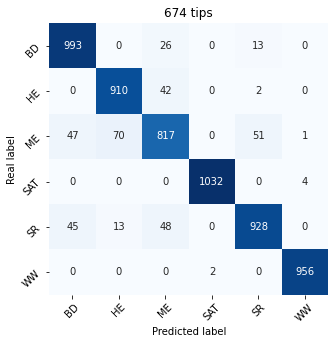

              precision    recall  f1-score   support

           0     0.9152    0.9622    0.9381      1032
           1     0.9164    0.9539    0.9348       954
           2     0.8757    0.8286    0.8515       986
           3     0.9981    0.9961    0.9971      1036
           4     0.9336    0.8975    0.9152      1034
           5     0.9948    0.9979    0.9964       958

    accuracy                         0.9393      6000
   macro avg     0.9390    0.9394    0.9388      6000
weighted avg     0.9391    0.9393    0.9389      6000



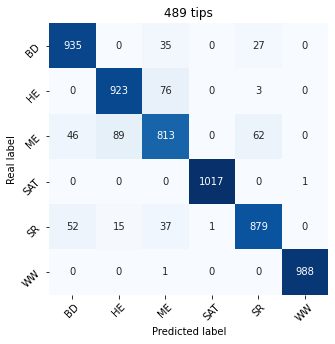

              precision    recall  f1-score   support

           0     0.9051    0.9378    0.9212       997
           1     0.8987    0.9212    0.9098      1002
           2     0.8451    0.8050    0.8245      1010
           3     0.9990    0.9990    0.9990      1018
           4     0.9053    0.8933    0.8992       984
           5     0.9990    0.9990    0.9990       989

    accuracy                         0.9258      6000
   macro avg     0.9254    0.9259    0.9255      6000
weighted avg     0.9254    0.9258    0.9254      6000



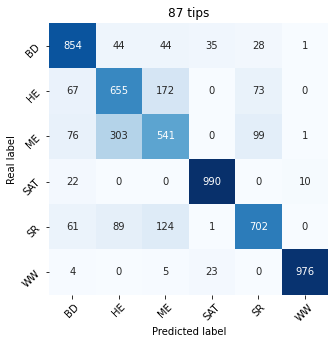

              precision    recall  f1-score   support

           0     0.7878    0.8489    0.8172      1006
           1     0.6004    0.6774    0.6365       967
           2     0.6106    0.5304    0.5677      1020
           3     0.9438    0.9687    0.9561      1022
           4     0.7783    0.7185    0.7472       977
           5     0.9879    0.9683    0.9780      1008

    accuracy                         0.7863      6000
   macro avg     0.7848    0.7854    0.7838      6000
weighted avg     0.7861    0.7863    0.7849      6000



In [8]:
label_names = ["BD", "HE", "ME", "SAT", "SR", "WW"]
for i in results_calibrated_model:
    plot_conf_mat((results_calibrated_model[i]["y_pred"]), (results_calibrated_model[i]["y_test"]), label_names, i)

# Train History

In [9]:
def train_plot(ax, i, metric):
    ax.plot(results[i]['history'][metric],
            linestyle='-', label='Train', color='blue', linewidth=.7)
    ax.plot(results[i]['history']['val_' + metric],
            linestyle='--', label='Validation', color='blue', linewidth=.7)
    

    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    ax.set_title(i)

NameError: name 'results' is not defined

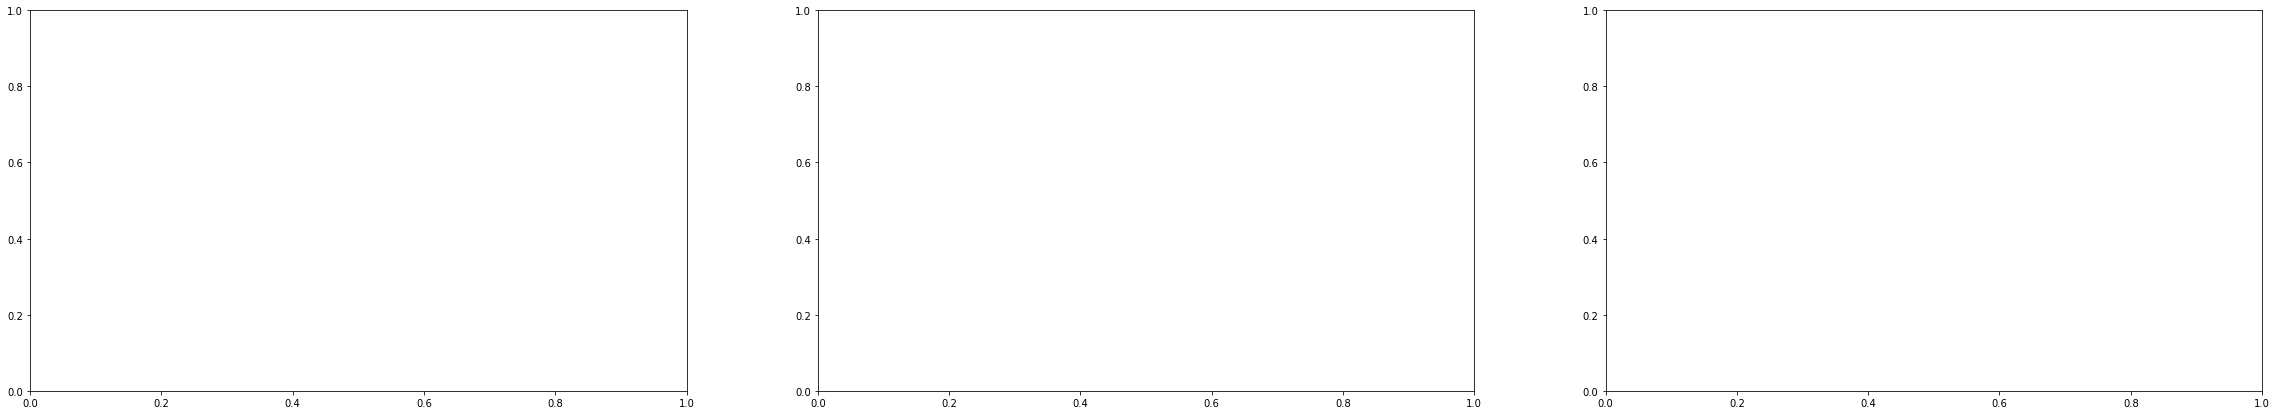

In [10]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'accuracy')
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

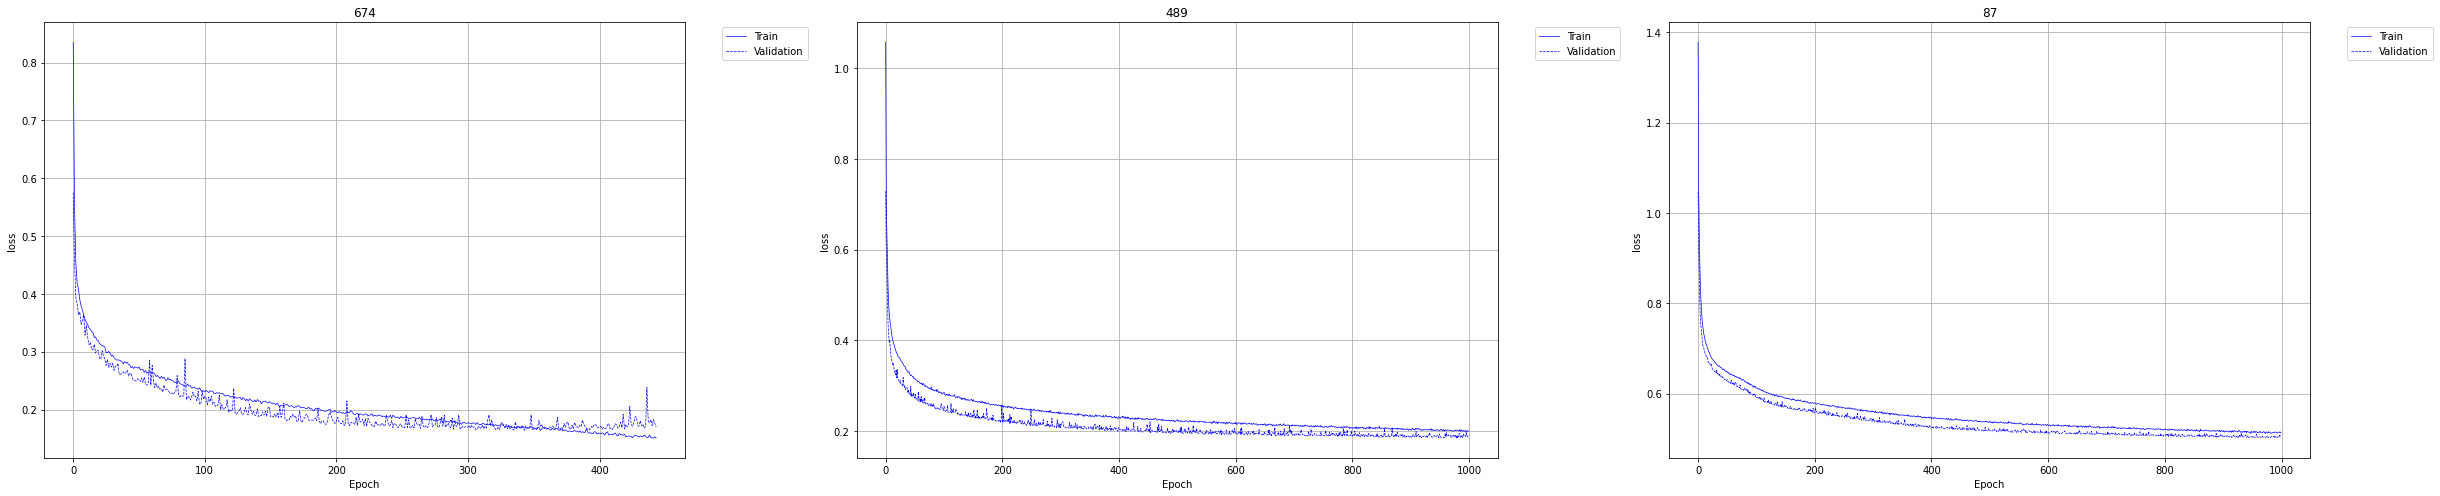

In [8]:
fig, ax = plt.subplots(1, len(n_tips), figsize=(40,7))
for i, j in enumerate(n_tips):
    train_plot(ax[i], j, 'loss')
    ax[i].grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

## Results stratified

<AxesSubplot:xlabel='N_tips'>

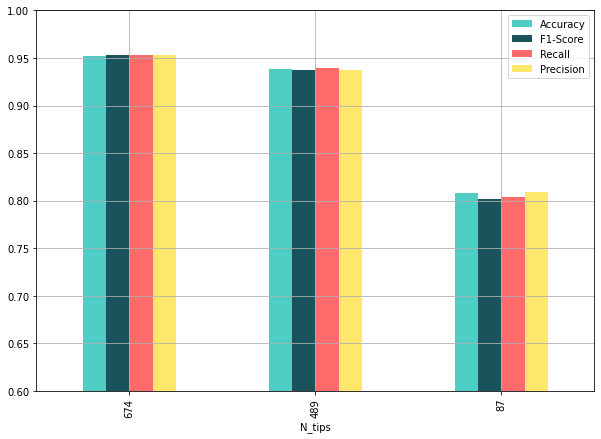

In [9]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Accuracy': [results[i]['accuracy'] for i in n_tips],
    'F1-Score': [results[i]['f1-score'] for i in n_tips],
    'Recall': [results[i]['recall'] for i in n_tips],
    'Precision': [results[i]['precision'] for i in n_tips],
})

df.plot(x="N_tips", y=["Accuracy", "F1-Score", "Recall", "Precision"], kind="bar",
        color=['#4ECDC4','#1A535C','#FF6B6B','#FFE66D'], figsize=(10,7),
        ylim=(0.6, 1), grid=True)

### Number of Params

<AxesSubplot:xlabel='N_tips'>

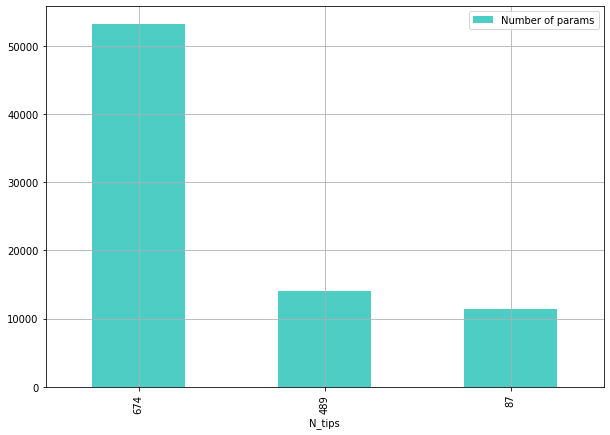

In [10]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Number of params': [results[i]['n_params'] for i in n_tips],
})

df.plot(x="N_tips", y=["Number of params"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)

### Training time

<AxesSubplot:xlabel='N_tips'>

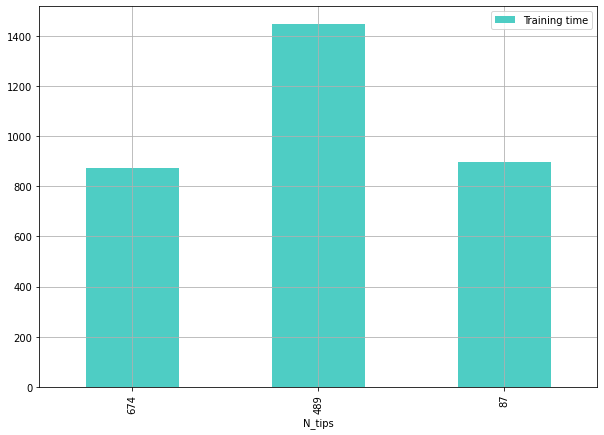

In [11]:
df = pd.DataFrame({ 
    'N_tips': n_tips, 
    'Training time': [results[i]['train_time'] for i in n_tips],
})

df.plot(x="N_tips", y=["Training time"], kind="bar",
        color=['#4ECDC4'], figsize=(10,7), grid=True)